In [ ]:
Project Complete.

## Project Steps
1. Fork repo
2. Add new variables using Python or R:
   - Retrieve the given data from the repository.
   - Using Python or R programming language, create two new variables: `year_of_birth` and `lived_years`.
   - Calculate the `lived_months` and `lived_days` variables based on the available data.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('U.S. Presidents Birth and Death Information - Sheet1.csv')

# Droping the last row as its a ref. link
df.drop(len(df)-1,axis=0, inplace=True)

In [ ]:
df[df.isna().any(axis=1)]['PRESIDENT'].values

array(['Jimmy Carter', 'Bill Clinton', 'George W. Bush', 'Barack Obama',
       'Donald Trump', 'Joe Biden'], dtype=object)

In [ ]:
# Find rows with NaN values in any column
display(df[df.isna().any(axis=1)])

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
37,Jimmy Carter,"Oct 1, 1924","Plains, Georgia",NaN,NaN
40,Bill Clinton,"Aug 19, 1946","Hope, Arkansas",NaN,NaN
41,George W. Bush,"July 6, 1946","New Haven, Conn.",NaN,NaN
42,Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",NaN,NaN
43,Donald Trump,"June 14, 1946","New York, New York",NaN,NaN
44,Joe Biden,"Nov 20, 1942","Scranton, Pa.",NaN,NaN


In [ ]:
# Convert 'BIRTH DATE' column to pandas datetime format using the 2 formats
# If a date does not match the 1st format, it will be set as NaT (Not a Time)
# Convert the remaining values in the 'BIRTH DATE' column to pandas datetime format using the second format
# The resulting series will contain pandas datetime objects for valid dates

df['BIRTH DATE'] = pd.to_datetime(df['BIRTH DATE'], format='%b %d, %Y', errors='coerce').fillna(pd.to_datetime(df['BIRTH DATE'], format='%B %d, %Y', errors='coerce'))

# Convert 'DEATH DATE' column to pandas datetime format using the 2 formats
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'], format='%b %d, %Y', errors='coerce').fillna(pd.to_datetime(df['DEATH DATE'], format='%B %d, %Y', errors='coerce'))


In [ ]:
# Find rows with NaN values in any column
rows_with_nan = df[df.isna().any(axis=1)].index

# Print the rows
display(df.loc[rows_with_nan])

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
37,Jimmy Carter,1924-10-01,"Plains, Georgia",NaT,NaN
40,Bill Clinton,1946-08-19,"Hope, Arkansas",NaT,NaN
41,George W. Bush,1946-07-06,"New Haven, Conn.",NaT,NaN
42,Barack Obama,1961-08-04,"Honolulu, Hawaii",NaT,NaN
43,Donald Trump,1946-06-14,"New York, New York",NaT,NaN
44,Joe Biden,1942-11-20,"Scranton, Pa.",NaT,NaN


In [ ]:
# Fill NaN values in the 'DEATH DATE' column with today's date
df['DEATH DATE'].fillna(pd.Timestamp.today().date(), inplace=True)

# Convert the 'DEATH DATE' column to datetime type
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])

In [ ]:
'''
create two new variables: `year_of_birth` and `lived_years`
'''

# Extract the year from the 'BIRTH DATE' column
df['year_of_birth'] = df['BIRTH DATE'].dt.year


df['lived_years'] = df['DEATH DATE'].dt.year - df['BIRTH DATE'].dt.year

In [ ]:
'''
Calculate the `lived_months` and `lived_days` variables based on the available data.
'''
# Calculate the difference between the 'DEATH DATE' and 'BIRTH DATE' in months
df['lived_months'] = (df['DEATH DATE'].dt.year - df['BIRTH DATE'].dt.year) * 12 + (df['DEATH DATE'].dt.month - df['BIRTH DATE'].dt.month)

# Calculate the difference between the 'DEATH DATE' and 'BIRTH DATE' in days
df['lived_days'] = (df['DEATH DATE'] - df['BIRTH DATE']).dt.days


In [ ]:
df.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,lived_years,lived_months,lived_days
0,George Washington,1732-02-22,"Westmoreland Co., Va.",1799-12-14,"Mount Vernon, Va.",1732,67,814,24767
1,John Adams,1735-10-30,"Quincy, Mass.",1826-07-04,"Quincy, Mass.",1735,91,1089,33119
2,Thomas Jefferson,1743-04-13,"Albemarle Co., Va.",1826-07-04,"Albemarle Co., Va.",1743,83,999,30397
3,James Madison,1751-03-16,"Port Conway, Va.",1836-06-28,"Orange Co., Va.",1751,85,1023,31150
4,James Monroe,1758-04-28,"Westmoreland Co., Va.",1831-07-04,"New York, New York",1758,73,879,26729


3. Create a ranking table of the top 10 longest-lived Presidents:
   - Sort the dataset based on the `lived_years` variable in descending order.
   - Select the top 10 Presidents with the longest-lived years.
   - Create a well-formatted output table displaying the ranking of the top 10 Presidents from longest lived to shortest lived.


In [ ]:
# Sort the DataFrame based on 'lived_years' in descending order, excluding the rows with NaN values
# sorted_df = df.drop(rows_with_nan).sort_values(by='lived_years', ascending=False)
sorted_df = df.sort_values(by='lived_years', ascending=False)

# Select the top 10 Presidents with the longest-lived years
top_10_longest_lived = sorted_df.head(10)

# Reset the index of the resulting DataFrame
top_10_longest_lived.reset_index(drop=True, inplace=True)

# Creating a well-formatted output table displaying the ranking of the top 10 Presidents
ranking_table = top_10_longest_lived[['PRESIDENT', 'lived_years']]
ranking_table.columns = ['President', 'Lived Years']
ranking_table.index += 1

# Display the ranking table
display(ranking_table)

,President,Lived Years
1,Jimmy Carter,99
2,George Bush,94
3,Ronald Reagan,93
4,Gerald Ford,93
5,John Adams,91
6,Herbert Hoover,90
7,Harry S. Truman,88
8,James Madison,85
9,Thomas Jefferson,83
10,Richard Nixon,81


4. Create a ranking table of the top 10 shortest-lived Presidents:
   - Sort the dataset based on the `lived_years` variable in ascending order.
   - Select the top 10 Presidents with the shortest-lived years.
   - Create a well-formatted output table displaying the ranking of the top 10 Presidents from shortest lived to longest lived.


In [ ]:
# Sort the DataFrame based on 'lived_years' in ascending order, excluding the rows with NaN values
sorted_df = df.drop(rows_with_nan).sort_values(by='lived_years', ascending=True)

# Select the top 10 Presidents with the shortest-lived years
top_10_shortest_lived = sorted_df.head(10)

# Reset the index of the resulting DataFrame
top_10_shortest_lived.reset_index(drop=True, inplace=True)

# Creating a well-formatted output table displaying the ranking of the top 10 Presidents
ranking_table = top_10_shortest_lived[['PRESIDENT', 'lived_years']]
ranking_table.columns = ['President', 'Lived Years']
ranking_table.index += 1

# Display the ranking table
display(ranking_table)

,President,Lived Years
1,John F. Kennedy,46
2,James A. Garfield,50
3,James K. Polk,54
4,Abraham Lincoln,56
5,Chester Arthur,57
6,Warren G. Harding,58
7,William McKinley,58
8,Calvin Coolidge,61
9,Theodore Roosevelt,61
10,Franklin Roosevelt,63


5. Calculate descriptive statistics for `lived_days`:
   - Calculate the mean, weighted average, median, mode, maximum, minimum, and standard deviation of the `lived_days` variable for the dataset.


In [ ]:
# Fill NaN values in the 'DEATH DATE' column with today's date
df['DEATH DATE'].fillna(pd.Timestamp.today().date(), inplace=True)

# Convert the 'DEATH DATE' column to datetime type
df['DEATH DATE'] = pd.to_datetime(df['DEATH DATE'])

In [ ]:
# Calculate the descriptive statistics
weighted_average_days = df['lived_days'].sum() / len(df)
median_days = df['lived_days'].median()
mode_days = df['lived_days'].mode().iloc[0]
mean_days = df['lived_days'].mean()
max_days = df['lived_days'].max()
min_days = df['lived_days'].min()
std_days = df['lived_days'].std()

6. Create a well-formatted table for the descriptive statistics:
   - Compile the calculated descriptive statistics into a table format.
   - Ensure the table is well-formatted with appropriate headers and values.


In [ ]:
# Create a DataFrame for the descriptive statistics
statistics_df = pd.DataFrame({
    'Statistic': ['Weighted Avg', 'Median', 'Mode', 'Mean', 'Max', 'Min', 'Std'],
    'Value': [weighted_average_days, median_days, mode_days, mean_days, max_days, min_days, std_days]
})

# Set the 'Statistic' column as the index
statistics_df.set_index('Statistic', inplace=True)

# Converting float type to int for Value
statistics_df['Value'] = statistics_df['Value'].astype(np.int32)

# Print the well-formatted table
display(statistics_df)

,Value
Statistic,
Weighted Avg,22617
Median,25673
Mode,16978
Mean,26097
Max,34504
Min,16978
Std,4596


7. Create a plot to show the distribution of `lived_days`:
   - Choose a plot type that best represents the distribution of the `lived_days` variable (e.g., histogram, box plot, etc.).
   - Generate the plot using the dataset and the chosen plot type.


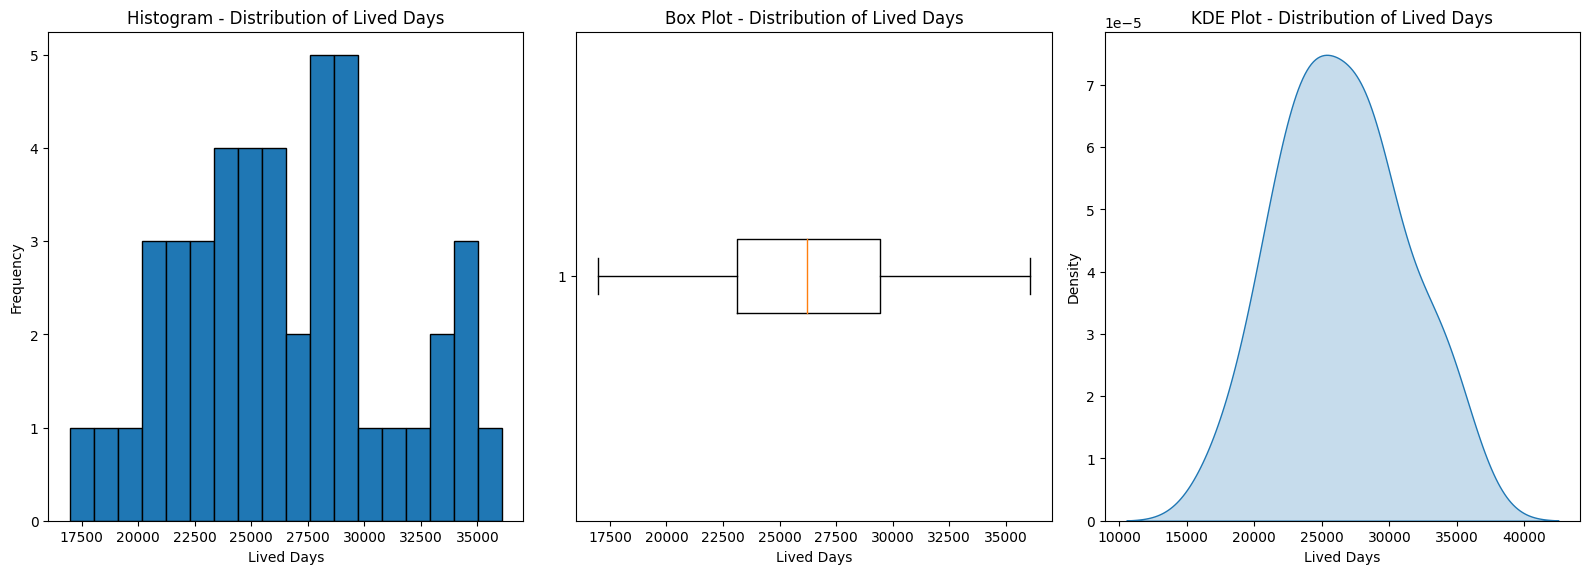

In [ ]:
# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(16, 6))

# Plot 1: Histogram
# Frequency distribution of the 'lived_days' variable.
axes[0].hist(df['lived_days'], bins=18, edgecolor='black')
axes[0].set_title('Histogram - Distribution of Lived Days')
axes[0].set_xlabel('Lived Days')
axes[0].set_ylabel('Frequency')

# Plot 2: Box Plot
# Summary statistics of the 'lived_days' variable.
# Median, quartiles, potential outliers, and the overall range of the data 
axes[1].boxplot(df['lived_days'], vert=False)
axes[1].set_title('Box Plot - Distribution of Lived Days')
axes[1].set_xlabel('Lived Days')

# Plot 3: KDE Plot
# robability density function of the 'lived_days' 
# Smoothness of the data distribution and highlights areas of high and low density.
sns.kdeplot(df['lived_days'], fill=True, ax=axes[2])
axes[2].set_title('KDE Plot - Distribution of Lived Days')
axes[2].set_xlabel('Lived Days')
axes[2].set_ylabel('Density')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [ ]:
df.columns

Index(['PRESIDENT', 'BIRTH DATE', 'BIRTH PLACE', 'DEATH DATE',
       'LOCATION OF DEATH', 'year_of_birth', 'lived_years', 'lived_months',
       'lived_days'],
      dtype='object')

<Figure size 500x400 with 0 Axes>

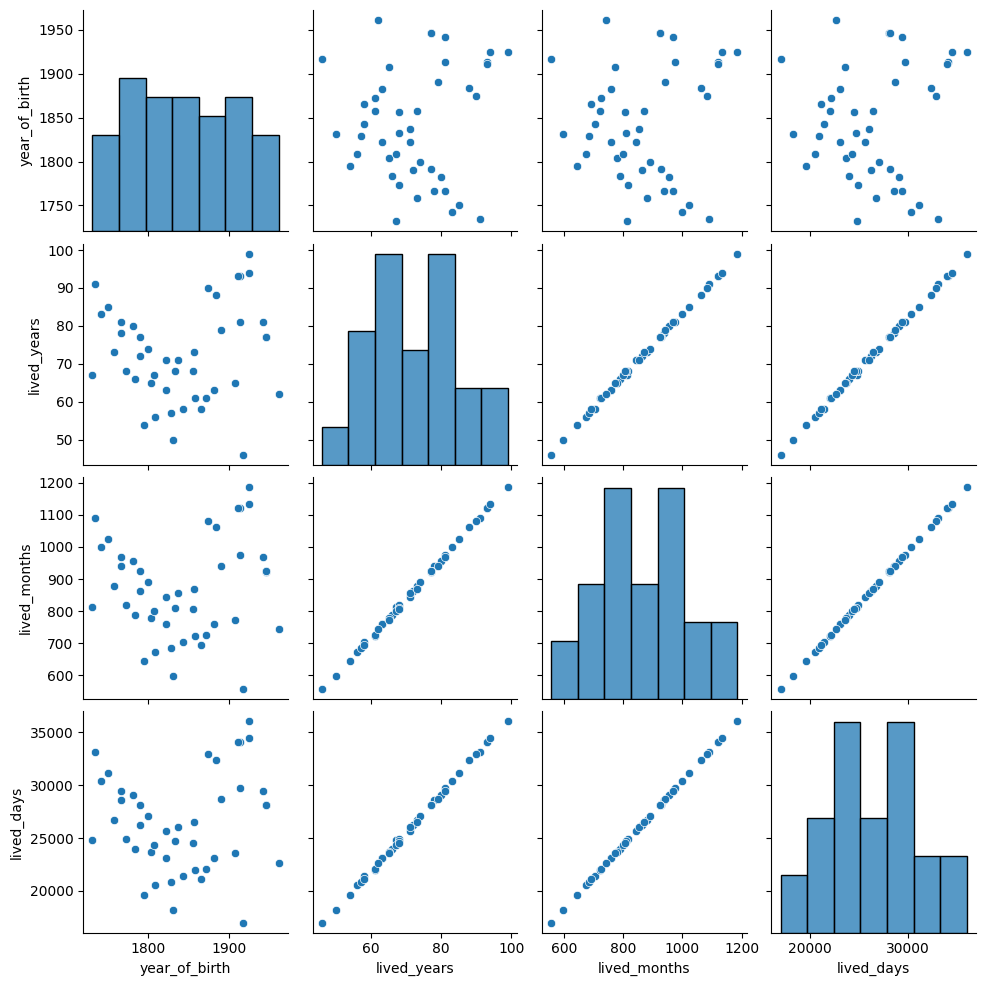

In [ ]:
plt.figure(figsize=(5,4))
sns.pairplot(data=df)
plt.show()

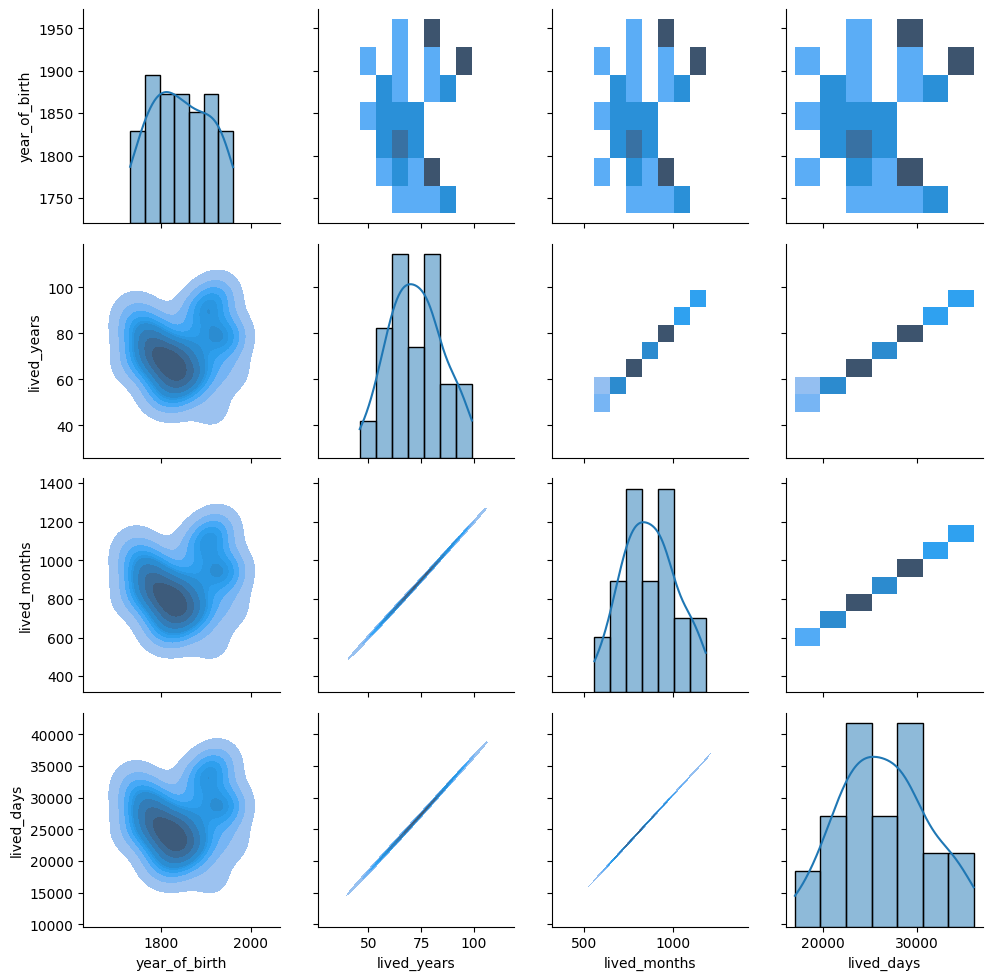

In [ ]:
g = sns.PairGrid(df)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)
plt.show()